# Введение в ML

## Исходные данные

Для начала скопируйте в корень гугл диска (своего) директорию с данными https://drive.google.com/drive/folders/1f0xJzIxfsfI_QbE6VB82W7xkcxTipgkP?usp=sharing

Будем использовать датасет по стоимости страховых услуг - подробнее см. [соревнование на Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

In [1]:
import logging
import os
import shutil 

import numpy as np
from google.colab import drive

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info('Инициализировали логгер')

ROOT_DIR = '/content/drive' 
drive.mount(ROOT_DIR)
logger.info('Подключили диск')

root_data_dir = os.path.join(ROOT_DIR, 'MyDrive', 'hse_nlp_2021')
if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  logger.info('Содержимое директории %s: %s', root_data_dir, os.listdir(root_data_dir))

ModuleNotFoundError: No module named 'google'

Среди файлов находится `insurance.csv` - это и есть данные по стоимости страховки, на примере которых мы познакомимся с основными понятиями ML

Прочитаем файл с помощью бибилиотеки pandas

In [2]:
import os
import pandas as pd

insurance_df = pd.read_csv(os.path.join(root_data_dir, 'insurance.csv'))

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Наш таргет (целевая переменная) находится в столбце `charges`

Визуализируем переменную с помощью `.scatter`

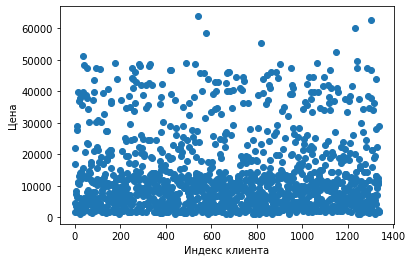

In [3]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

y = insurance_df['charges']

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(len(y)),
    y
)
subplot.set_xlabel('Индекс клиента')
subplot.set_ylabel('Цена')
fig.show()

Получается не очень наглядно - попробуем визуализировать с помощью метода `.hist()` который реализован в pandas

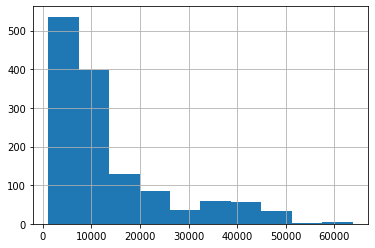

In [4]:
y.hist()

Для каждого объекта построим предсказания с помощью модели линейной регрессии. Воспользуемся как чёрным ящиком питоновским объектом из бибилиотеки [sklearn](https://scikit-learn.org/stable/)

Модели машинного обучения не могут работать с текстом напрямую (вспоминаем лекцию) - а у нас много текстовых полей, их нужно трансформировать в числа - воспользуемся классом `sklearn.preprocessing.LabelEncoder` из библиотеки sklearn

Чтобы преобразовать колонку в текст нужно воспользоватьеся методом [.fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)

In [5]:
from sklearn.preprocessing import LabelEncoder

for label in ['sex', 'smoker', 'region']:
  insurance_df[label] = LabelEncoder().fit_transform(insurance_df[label])

insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Обучим линейную регрессию - это класс [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Что нужно для счастья
* создать объект
* вызвать метод *.fit()*

Загляните в документацию метода [.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) который принимает на вход два аргумента

* $X$ - матрица объекты - признаки. Удалите из датафрейма `insurance_df` столбец `charges` и сохраните результат в переменную $X$
* `y` - значение целевой переменной

In [19]:
#-------- ВАШ КОД ТУТ -------------------
from sklearn.linear_model import LinearRegression
y = insurance_df['charges']
X = insurance_df.drop(['charges'], axis=1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)




#----------------------------------------

0.8367930843169072

Добавим к датафрейму столбец `prediction`

In [20]:
insurance_df['prediction'] = reg.predict(X)

In [21]:
print(insurance_df)

      age  sex     bmi  children  smoker  region      charges    prediction  \
0      19    0  27.900         0       1       3  16884.92400  24588.735339   
1      18    1  33.770         1       0       2   1725.55230   2762.105104   
2      28    1  33.000         3       0       2   4449.46200   6052.470771   
3      33    1  22.705         0       0       1  21984.47061  18519.039051   
4      32    1  28.880         0       0       1   3866.85520   4597.671033   
...   ...  ...     ...       ...     ...     ...          ...           ...   
1333   50    1  30.970         3       0       1  10600.54830  11167.121018   
1334   18    0  31.920         0       0       0   2205.98080   2114.735799   
1335   18    0  36.850         0       0       2   1629.83350   3493.010258   
1336   21    0  25.800         0       0       3   2007.94500    215.865444   
1337   61    0  29.070         0       1       1  29141.36030  36013.685008   

      squared_loss  
0     6.767231e+07  
1     3.8

Задача - посчитайте эмпирический риск по формуле 

$$
Q_{\text{emp}}(h) = \frac{1}{N}\sum_{i=1}^{N}L(h(x_i, \theta), y_i)
$$

где $h(\cdot)$ - значение столбца prediction

Для удобства создайте столбец `squared_loss` - там должно храниться значение $L(y,\hat{y})$:

$L(y,\hat{y}) = (y - \hat{y})^2$

Пользоваться можно только функциями pandas

Полученное значение $Q$ округлите с помощью `np.round(Q, decimals=1)`

In [22]:
num_rows = insurance_df.shape[0]
insurance_df['squared_loss'] = np.zeros(num_rows)
#-------- ВАШ КОД ТУТ -------------------
N = len(y)
L = (y - insurance_df['prediction'])**2
insurance_df['squared_loss'] = L
Q = (1/N)*sum(L)
Q = np.round(Q, decimals=1)
print(Q)
print(insurance_df)


#----------------------------------------

23916792.9
      age  sex     bmi  children  smoker  region      charges    prediction  \
0      19    0  27.900         0       1       3  16884.92400  24588.735339   
1      18    1  33.770         1       0       2   1725.55230   2762.105104   
2      28    1  33.000         3       0       2   4449.46200   6052.470771   
3      33    1  22.705         0       0       1  21984.47061  18519.039051   
4      32    1  28.880         0       0       1   3866.85520   4597.671033   
...   ...  ...     ...       ...     ...     ...          ...           ...   
1333   50    1  30.970         3       0       1  10600.54830  11167.121018   
1334   18    0  31.920         0       0       0   2205.98080   2114.735799   
1335   18    0  36.850         0       0       2   1629.83350   3493.010258   
1336   21    0  25.800         0       0       3   2007.94500    215.865444   
1337   61    0  29.070         0       1       1  29141.36030  36013.685008   

      squared_loss  
0     5.934871e+07 

Визуализируем гистограмму остатков линейной регрессии - это разница между истинным и предсказанным значением.

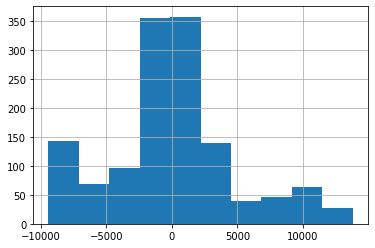

In [23]:
(insurance_df['prediction'] - y).hist()

Кстати, метрику качества необязательно считать вручную - в sklearn реализовано [огромное количество метрик](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) для регрессии (и других задач тоже)

Подробнее о метриках регрессии мы поговорим в дальнейших занятиях

В качестве упражнения посчитайте какую-нибудь метрику - например, MAE - [sklearn.metrics.mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [24]:
#-------- ВАШ КОД ТУТ -------------------
from sklearn.metrics import mean_absolute_error
y_true = insurance_df['charges']
y_pred = insurance_df['prediction']
mean_absolute_error(y_true, y_pred)

#----------------------------------------

3550.6125901283226

Мы поговорили про фичи, про метрики - можно немного углубиться в модель, что представляет собой линейная регрессия?

Задача *линейной* регресии: восстановить на функцию $h(x_i)$ в виде *линейной комбинации* (т.е. суммы с некоторыми весами *важности*) признаков объекта. Сами признаки называются *предикторами*:,
$$
\forall x_i: h(x) = w_0 + w_1x_i^1 + \ldots + w_nx_i^n = \sum_{j=1}^{n}w_jx_i^j = \overline{x}_i^T\overline{w}
$$

К признаковому пространству добавляется "фиктивный" признак $x_0=1$, "важность" которого сохраняется в коэффициент $w_0$.

То есть "семейство функций" представляет собой всевозможные комбинации $[w_0, w_1 , w_2 , w_3 , w_4 , w_5 , w_6]$ а метод *.fit()* волшебным образом подбирает их так, чтобы получить максимальное качество.

Мера качества $L$ для задачи регрессии - квадрат разности между фактическим значением и прогнозом. ,
$$
L(h(x_i, \theta), y_i) = \left(y_i - h(x_i, \theta)\right)^2 = \left(y_i -  \sum_{j=1}^{n}w_jx_i^j\right)^2
$$

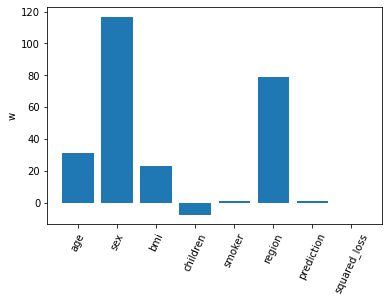

In [25]:
fig, subplot = plt.subplots()
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
subplot.set_xticks(np.arange(len(reg.coef_)))
subplot.set_xticklabels(X.columns.tolist(), rotation=65)
subplot.set_ylabel('w')
fig.show()

В качестве финального задания разберёмся как делать валидацию

Нам понадобится функция [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Функция принимает несколько аргументов

* `X, y` - первые два аргумента, которые нужно засплиттить
* `test_size=0.33` - доля датасета, которая уйдет в тест
* `random_state=RANDOM_SEED`

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split([1, 2, 3, 4], [5, 6, 7, 8], test_size=0.33, random_state=42)
#-------- ВАШ КОД ТУТ -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)




#----------------------------------------

Обучите модель на X_train, y_train вызвав метод fit

In [27]:

#-------- ВАШ КОД ТУТ -------------------
validated_reg = LinearRegression().fit(X_train, y_train)





#----------------------------------------

Сделайте предикт на `X_test`, `y_test` - сохраните его в переменную `y_test_predicted`

In [28]:
y_test_predicted = np.zeros_like(y_test)
#-------- ВАШ КОД ТУТ -------------------
y_test_predicted = validated_reg.predict(X_test)




#----------------------------------------

Посчитайте [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

* `y_true`
* `y_pred`

Ответ округлите `np.round(mse, decimals=1)`

In [29]:
#-------- ВАШ КОД ТУТ -------------------
y_true = y_test
y_pred = y_test_predicted
mse = mean_absolute_error(y_true, y_pred)
np.round(mse, decimals=1)





#----------------------------------------

3661.2